In [1]:
import os 
from scipy import ndimage
from subprocess import check_output

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

(<matplotlib.axes._subplots.AxesSubplot at 0x7efd772e2b10>,
 <matplotlib.image.AxesImage at 0x7efd77344510>)

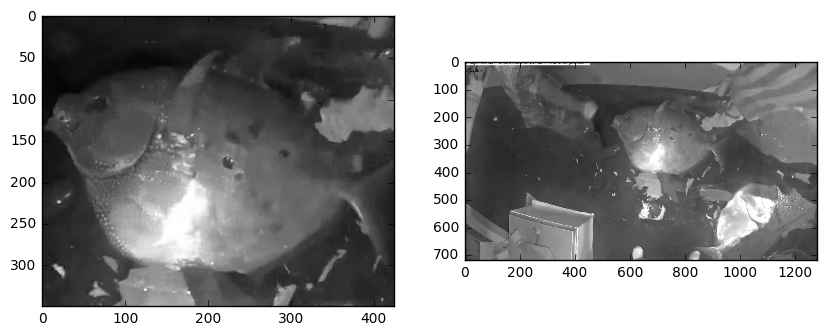

In [7]:
img_rows, img_cols= 350, 425
im_array = cv2.imread('train/LAG/img_00091.jpg',0)
template = np.zeros([ img_rows, img_cols], dtype='uint8') # initialisation of the template
template[:, :] = im_array[100:450,525:950] # I try multiple times to find the correct rectangle. 
#template /= 255.
plt.subplots(figsize=(10, 7))
plt.subplot(121),plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

In [9]:
template

array([[ 55,  55,  55, ..., 108, 106, 103],
       [ 55,  54,  55, ..., 107, 105, 101],
       [ 54,  53,  53, ..., 105, 103,  99],
       ..., 
       [ 83,  83,  82, ...,  74,  74,  74],
       [ 82,  81,  81, ...,  75,  76,  76],
       [ 83,  82,  81, ...,  75,  76,  76]], dtype=uint8)

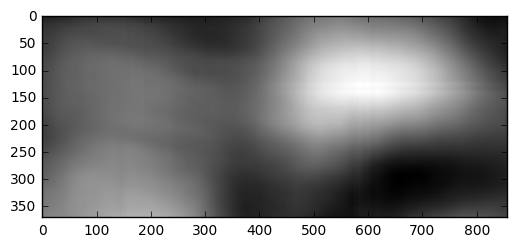

In [14]:
plt.imshow(res,cmap = 'gray')

In [15]:
min_val, max_val, min_loc, max_loc

(-130032000.0, 249820928.0, (661, 298), (582, 125))

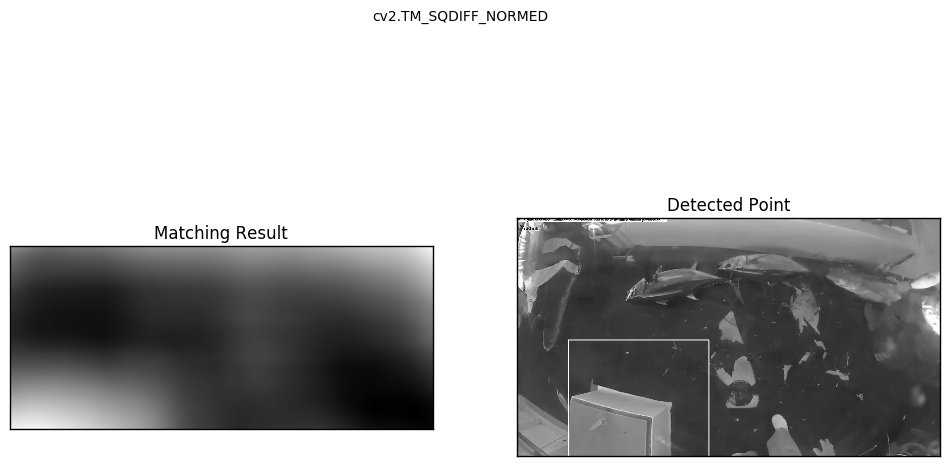

In [22]:
file_name = 'test_stg1/img_00009.jpg' # img_00176,img_02758, img_01512
img = cv2.imread(file_name,0) 
img2 = img
w, h = template.shape[::-1]

method=eval('cv2.TM_CCORR')

res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)
fig, ax = plt.subplots(figsize=(12, 7))
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.suptitle(meth)

plt.show()

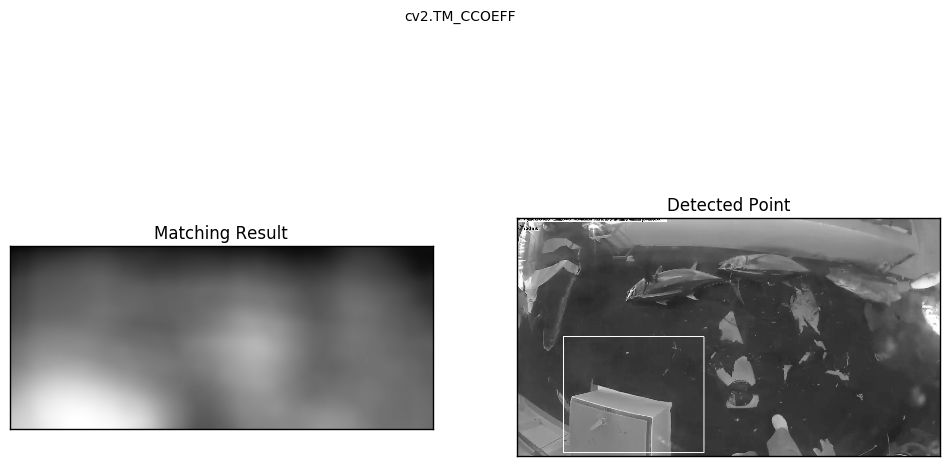

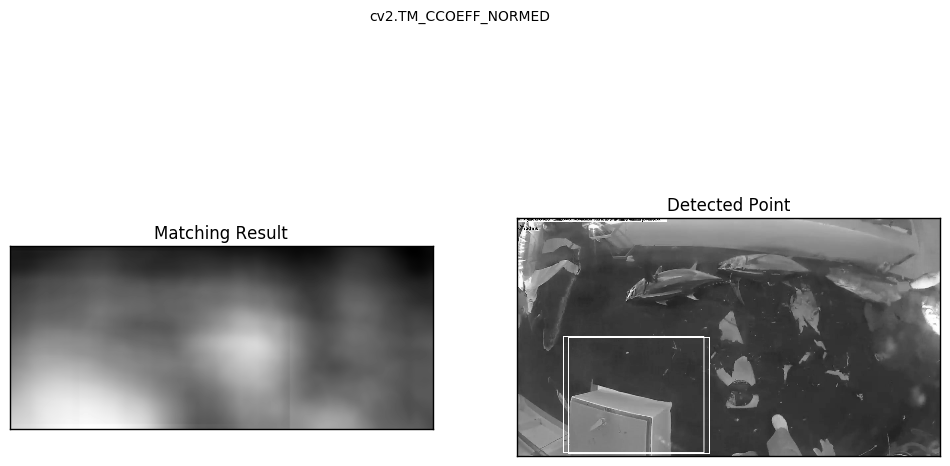

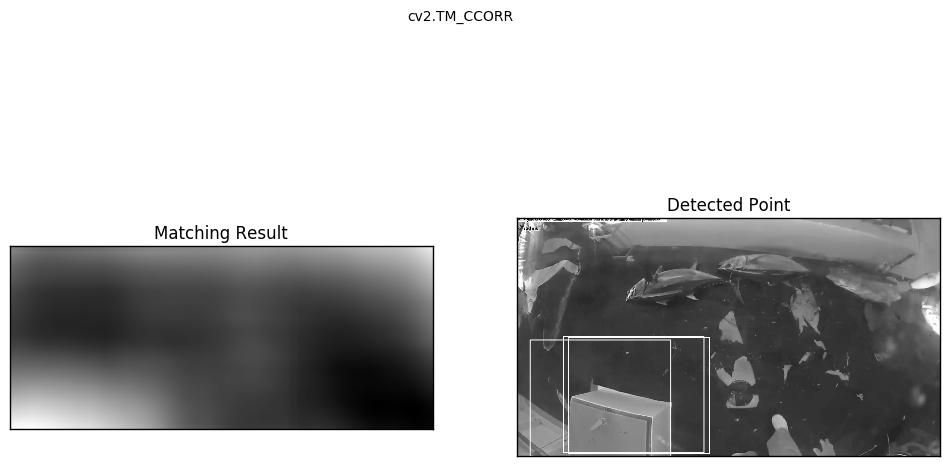

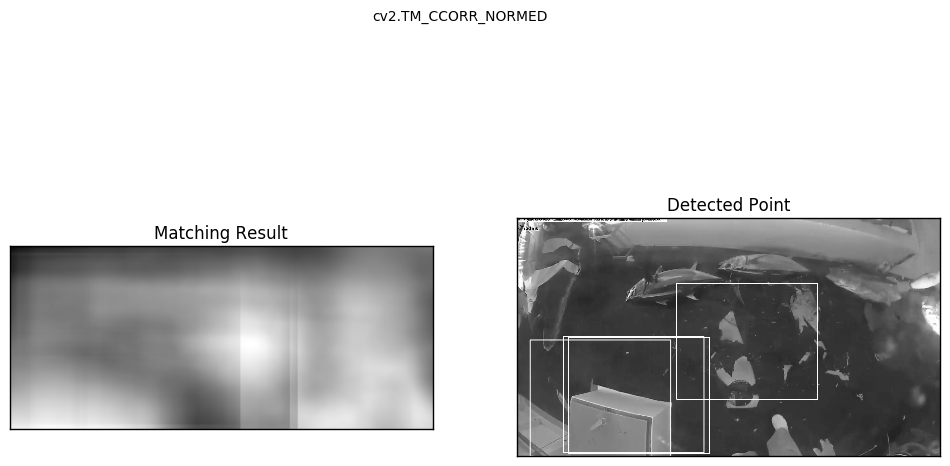

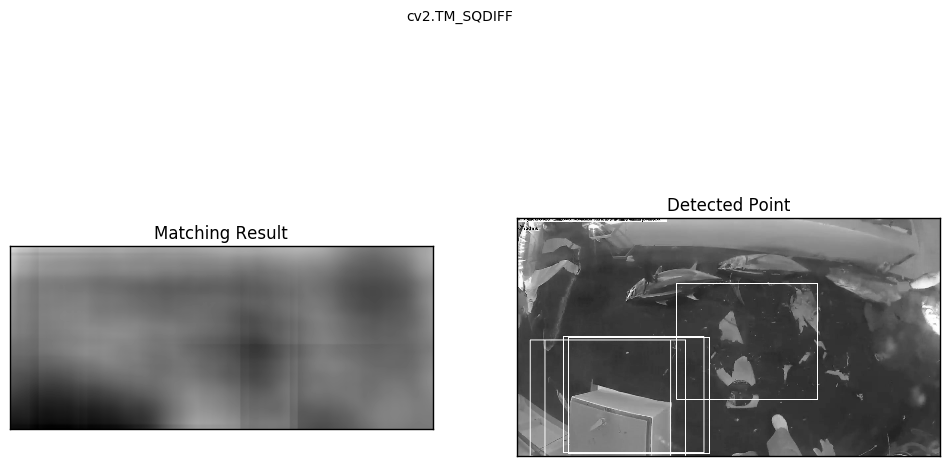

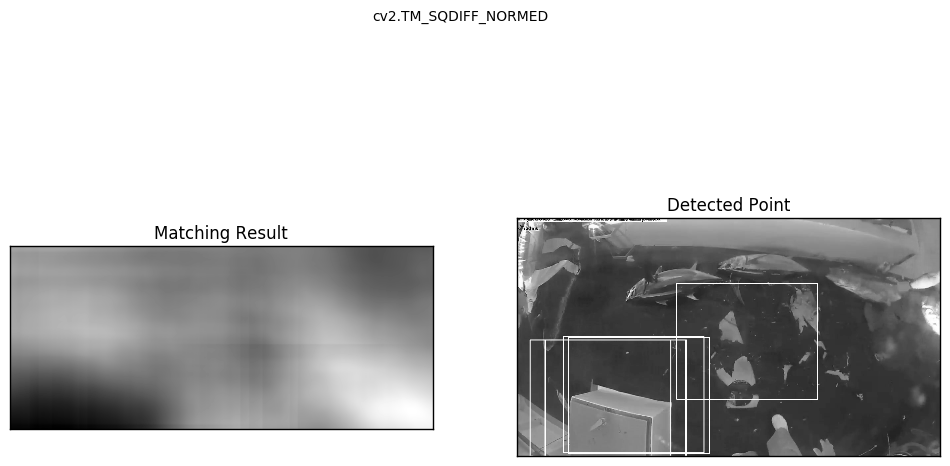

In [23]:
file_name = 'train/LAG/img_01512.jpg' # img_00176,img_02758, img_01512
img = cv2.imread(file_name,0) 
img2 = img
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
     img = img2
     method = eval(meth)
 
     # Apply template Matching
     res = cv2.matchTemplate(img,template,method)
     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
 
     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
         top_left = min_loc
     else:
         top_left = max_loc
     bottom_right = (top_left[0] + w, top_left[1] + h)
 
     cv2.rectangle(img,top_left, bottom_right, 255, 2)
     fig, ax = plt.subplots(figsize=(12, 7))
     plt.subplot(121),plt.imshow(res,cmap = 'gray')
     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
     plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
     plt.suptitle(meth)
 
     plt.show()

In [100]:
cv2.rectangle(img,top_left, bottom_right, 255, 2)

In [101]:
top_left

(86, 370)

In [24]:
train_path = "train/"
sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
for sub_folder in sub_folders:
    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')

In [57]:
import json
from pprint import pprint

#read the json
with open('train/YFT/yft_labels.json') as data_file:    
    #data = json.load(data_file)
    d=json.load(data_file)
    print(d)

[{u'filename': u'img_07860.jpg', u'annotations': [], u'class': u'image'}, {u'filename': u'img_00004.jpg', u'annotations': [{u'y': 487.3730266597728, u'x': 560.2400723123369, u'class': u'point'}, {u'y': 665.0000000000003, u'x': 892.0000000000003, u'class': u'point'}], u'class': u'image'}, {u'filename': u'img_00014.jpg', u'annotations': [{u'y': 345.8198314166771, u'x': 381.6560833769545, u'class': u'point'}, {u'y': 471.8439841436527, u'x': 553.0728219202815, u'class': u'point'}], u'class': u'image'}, {u'filename': u'img_00021.jpg', u'annotations': [{u'y': 620.4000000000004, u'x': 891.1200000000007, u'class': u'point'}, {u'y': 414.5400000000003, u'x': 885.4800000000007, u'class': u'point'}], u'class': u'image'}, {u'filename': u'img_00023.jpg', u'annotations': [{u'y': 428.6400000000003, u'x': 235.47000000000017, u'class': u'point'}, {u'y': 442.74000000000035, u'x': 461.07000000000033, u'class': u'point'}], u'class': u'image'}, {u'filename': u'img_00047.jpg', u'annotations': [{u'y': 148.000

In [93]:
def get_im_cv2(path):
    img = cv2.imread(path)
    #resized = cv2.resize(img, (32, 32), interpolation=cv2.INTER_LINEAR)
    return img

In [97]:
import time
import glob
X_train = []
X_train_id = []
y_train = []
start_time = time.time()

fld='YFT'
#index = folders.index(fld)
#print('Load folder {} (Index: {})'.format(fld, index))
path = os.path.join('train', fld, '*.jpg')
files = glob.glob(path)
for item in d:
    if item['annotations']!=[]:
        path = os.path.join('train', fld, item['filename'])
        #load_file(item['filename'])
        flbase = os.path.basename(path)
        img = get_im_cv2(path)
        X_train.append(img)
        X_train_id.append(flbase)
        fish_loc=[item['annotations'][0]['x'],item['annotations'][0]['y'],item['annotations'][1]['x'],item['annotations'][1]['y']]
        y_train.append(fish_loc)
        

In [98]:
y_train

[[560.2400723123369, 487.3730266597728, 892.0000000000003, 665.0000000000003],
 [381.6560833769545, 345.8198314166771, 553.0728219202815, 471.8439841436527],
 [891.1200000000007, 620.4000000000004, 885.4800000000007, 414.5400000000003],
 [235.47000000000017,
  428.6400000000003,
  461.07000000000033,
  442.74000000000035],
 [607.0000000000006,
  148.00000000000014,
  493.00000000000045,
  275.0000000000002],
 [404.00000000000034,
  386.00000000000034,
  561.0000000000005,
  349.0000000000003],
 [586.4895000000007, 168.9885000000002, 974.1690000000011, 238.57200000000026],
 [751.5018000000008, 544.7394000000006, 932.418900000001, 789.2757000000008],
 [443.3463000000005, 469.1916000000005, 612.3348000000007, 495.03690000000057],
 [767.4066000000008, 489.07260000000053, 922.478400000001, 330.02460000000036],
 [745.5375000000008,
  147.11940000000016,
  1105.3836000000013,
  282.3102000000003],
 [491.06070000000057, 457.2630000000005, 713.7279000000008, 656.0730000000008],
 [15.90480000000

In [ ]:
for i in range(219):
    fish_top=(int(y_train[i][0]),int(y_train[i][1]))
    fish_bottom=(int(y_train[i][2]),int(y_train[i][3]))
    cv2.rectangle(X_train[i],fish_top,fish_bottom , 255, 2)
 #fig, ax = plt.subplots(figsize=(12, 7))
    plt.imshow(X_train[i],cmap = 'gray')

In [123]:
fish_top=(int(y_train[0][0]),int(y_train[0][1]))
fish_bottom=(int(y_train[0][2]),int(y_train[0][3]))

In [122]:
fish_bottom

(381, 345)

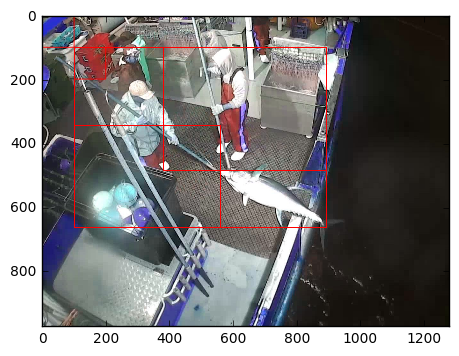

In [128]:
cv2.rectangle(X_train[0],fish_top,fish_bottom , 255, 2)
 #fig, ax = plt.subplots(figsize=(12, 7))
plt.imshow(X_train[0],cmap = 'gray')
#plt.show()

In [108]:
d[1]

{u'annotations': [{u'class': u'point',
   u'x': 560.2400723123369,
   u'y': 487.3730266597728},
  {u'class': u'point', u'x': 892.0000000000003, u'y': 665.0000000000003}],
 u'class': u'image',
 u'filename': u'img_00004.jpg'}

In [111]:
y_train[0]

[560.2400723123369, 487.3730266597728, 892.0000000000003, 665.0000000000003]

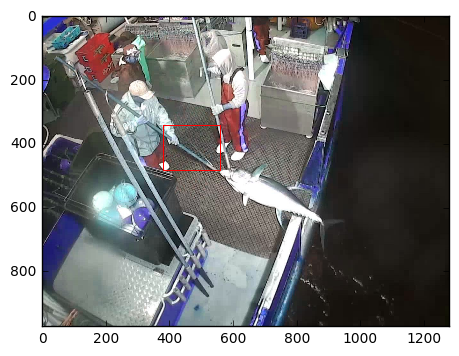

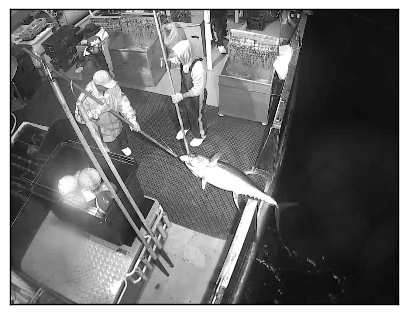

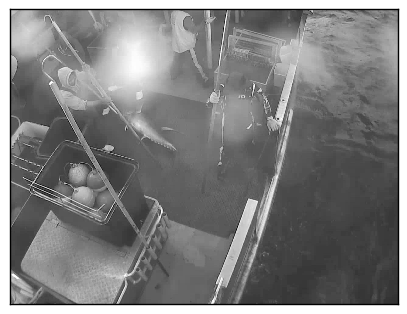

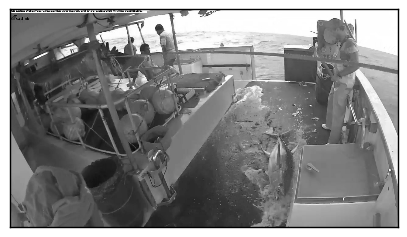

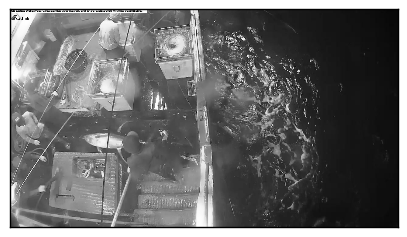

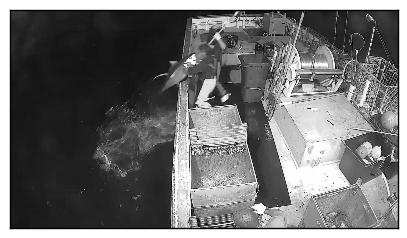

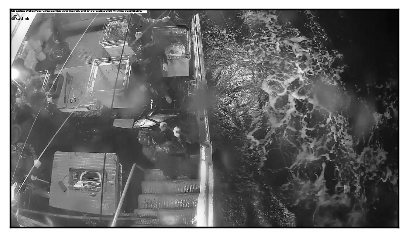

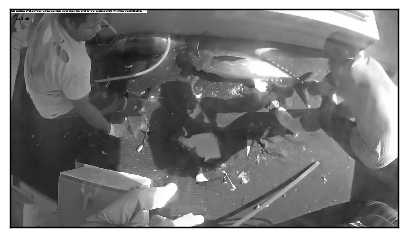

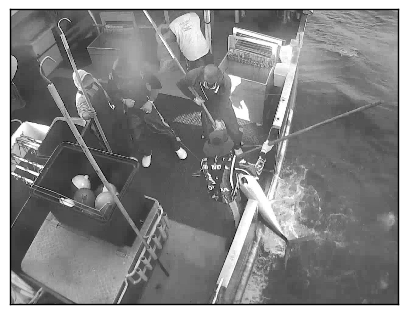

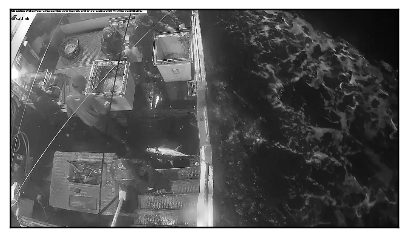

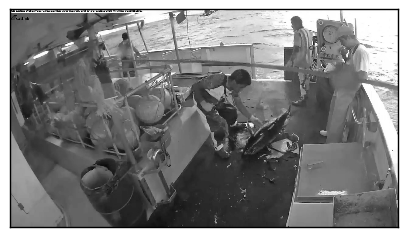

In [87]:
i=1

for file_name in file_names[:10]:
    _, ax = plt.subplots(1,1,figsize=(5, 5))
    
    img = cv2.imread(train_path+sub_folder+"/"+file_name,0)
    #resized = cv2.resize(img, (100, 100), interpolation=cv2.INTER_LINEAR)
    plt.imshow(img,cmap = 'gray')
    plt.xticks([]), plt.yticks([])
plt.show()